In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv(r'C:\Users\truel\Documents\Projet3\histo_cumul.csv') #cumul des degra et logs vols

In [59]:
df.head(20)

,ref_deg,aero,ref_compo,usure_nouvelle,measure_day,need_replacement,time_en_air,etat_voyant,temperature,pressure,...,desc,lifespan,cout_compo,cout_immo,cout_total,flighttime_cumul,pressure_cumul,vibrations_cumul,ecart_temperature,ecart_t_cumul
0,D003661,E170_6353,REAE170-E170_6353-0,53.308375,2024-06-01,False,0.0,0.0,0.0,0.0,...,Réacteur gauche,13045,15552,0,0,0.0,0.0,0.0,NaN,NaN
1,D009402,E170_6353,REAE170-E170_6353-1,50.111950,2024-06-01,False,0.0,0.0,0.0,0.0,...,Réacteur droit,13626,17559,0,0,0.0,0.0,0.0,NaN,NaN
2,D000812,E170_6353,SYSE170-E170_6353-2,16.730575,2024-06-01,False,0.0,0.0,0.0,0.0,...,Système de navigation,10541,16514,0,0,0.0,0.0,0.0,NaN,NaN
3,D006665,E170_6353,ORDE170-E170_6353-3,6.653075,2024-06-01,False,0.0,0.0,0.0,0.0,...,Ordinateur de vol,10441,16047,0,0,0.0,0.0,0.0,NaN,NaN
4,D001163,E170_6353,AUTE170-E170_6353-4,42.033525,2024-06-01,False,0.0,0.0,0.0,0.0,...,Autopilote,14847,19362,0,0,0.0,0.0,0.0,NaN,NaN
5,D004039,E170_6353,SYSE170-E170_6353-5,5.543500,2024-06-01,False,0.0,0.0,0.0,0.0,...,Système de contrôle de vol,12580,19492,0,0,0.0,0.0,0.0,NaN,NaN
6,D003609,E170_6353,RADE170-E170_6353-6,22.154225,2024-06-01,False,0.0,0.0,0.0,0.0,...,Radar météorologique,11923,17567,0,0,0.0,0.0,0.0,NaN,NaN
7,D000662,E170_6353,SYSE170-E170_6353-7,26.167750,2024-06-01,False,0.0,0.0,0.0,0.0,...,Système de communication radio,10370,19214,0,0,0.0,0.0,0.0,NaN,NaN
8,D005726,E170_6353,SYSE170-E170_6353-8,2.441425,2024-06-01,False,0.0,0.0,0.0,0.0,...,Système de gestion de carburant,13219,18351,0,0,0.0,0.0,0.0,NaN,NaN
9,D001649,E170_6353,SYSE170-E170_6353-9,31.011725,2024-06-01,False,0.0,0.0,0.0,0.0,...,Système d'alerte de proximité au sol (GPWS),10423,18680,0,0,0.0,0.0,0.0,NaN,NaN


In [60]:
df.describe()

,usure_nouvelle,time_en_air,etat_voyant,temperature,pressure,vibrations,lifespan,cout_compo,cout_immo,cout_total,flighttime_cumul,pressure_cumul,vibrations_cumul,ecart_temperature,ecart_t_cumul
count,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,220034.000000,209639.000000,209639.000000
mean,37.783395,4.955397,0.175159,0.124313,920.235969,2.404766,13571.683581,11420.091054,4399.842752,4407.288155,54.813271,10136.459430,26.396986,-0.063667,0.086683
std,18.107207,2.559239,0.440494,9.168775,161.616500,1.508757,8480.111958,5762.960754,17286.714529,17307.014073,33.929893,6158.739756,16.688234,13.027003,10.751003
min,0.110000,0.000000,0.000000,-29.900000,0.000000,0.000000,10023.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.800000,-44.400000
25%,22.723661,3.200000,0.000000,-6.100000,913.000000,0.985458,11015.000000,4801.000000,0.000000,0.000000,26.200000,4756.800000,12.331537,-8.900000,-7.100000
50%,37.857900,4.900000,0.000000,0.200000,943.900000,2.502061,12643.000000,12664.000000,0.000000,0.000000,53.500000,9824.400000,25.353515,-0.100000,0.400000
75%,52.674464,6.700000,0.000000,6.300000,978.000000,3.739875,13626.000000,16266.000000,0.000000,0.000000,80.900000,15062.300000,39.089010,8.900000,7.300000
max,100.000000,15.000000,3.000000,35.000000,1106.200000,4.999276,68978.000000,19492.000000,210000.000000,213593.000000,174.300000,29505.900000,73.241408,47.700000,48.700000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220034 entries, 0 to 220033
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ref_deg            220034 non-null  object 
 1   aero               220034 non-null  object 
 2   ref_compo          220034 non-null  object 
 3   usure_nouvelle     220034 non-null  float64
 4   measure_day        220034 non-null  object 
 5   need_replacement   220034 non-null  bool   
 6   time_en_air        220034 non-null  float64
 7   etat_voyant        220034 non-null  float64
 8   temperature        220034 non-null  float64
 9   pressure           220034 non-null  float64
 10  vibrations         220034 non-null  float64
 11  categorie          220034 non-null  object 
 12  desc               220034 non-null  object 
 13  lifespan           220034 non-null  int64  
 14  cout_compo         220034 non-null  int64  
 15  cout_immo          220034 non-null  int64  
 16  co

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns


Analyse et visualisation de l'évolution des dégradations et états des voyants.

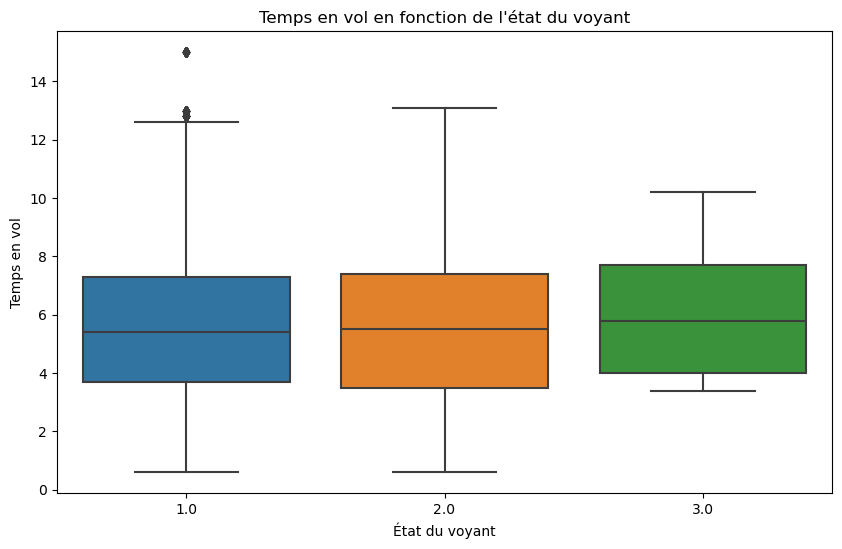

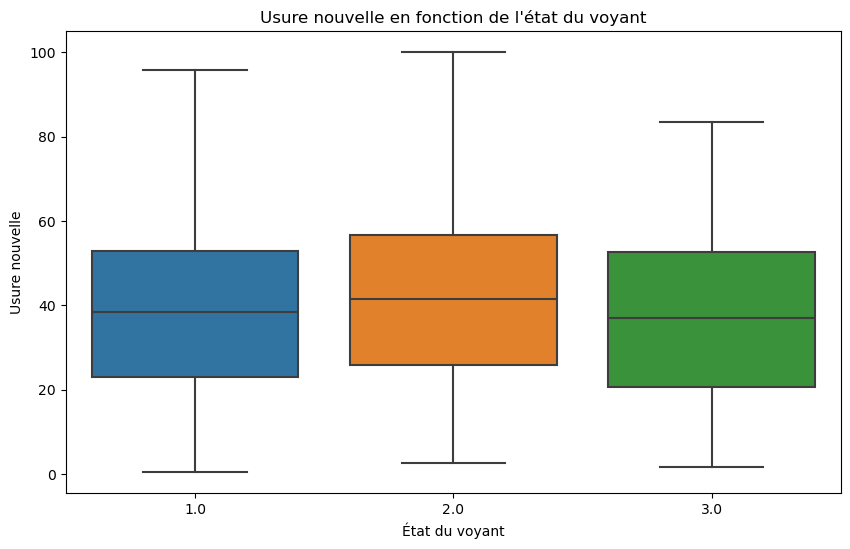

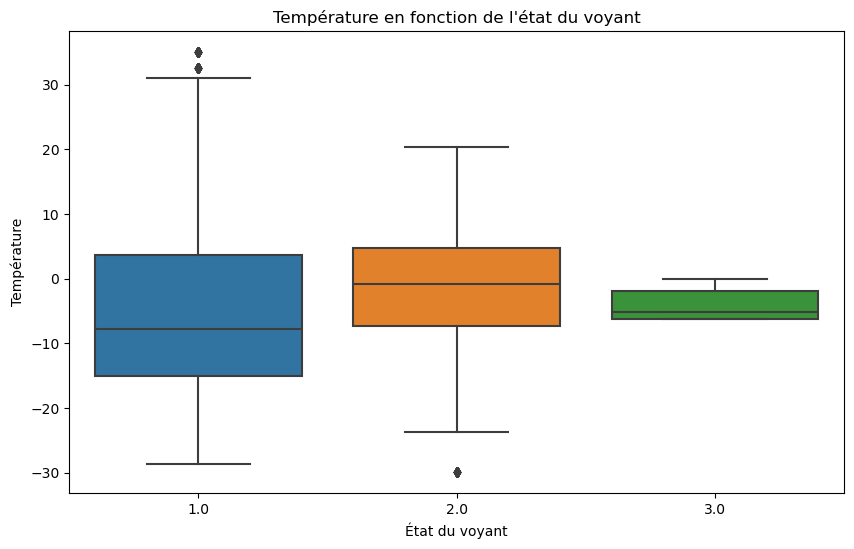

In [63]:
maintenanceNeeded = df[df['etat_voyant'] > 0]

# facteurs qui peuvent déclencher la maintenance
plt.figure(figsize=(10, 6))
sns.boxplot(x='etat_voyant', y='time_en_air', data=maintenanceNeeded)
plt.title('Temps en vol en fonction de l\'état du voyant')
plt.xlabel('État du voyant')
plt.ylabel('Temps en vol')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='etat_voyant', y='usure_nouvelle', data=maintenanceNeeded)
plt.title('Usure nouvelle en fonction de l\'état du voyant')
plt.xlabel('État du voyant')
plt.ylabel('Usure nouvelle')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='etat_voyant', y='temperature', data=maintenanceNeeded)
plt.title('Température en fonction de l\'état du voyant')
plt.xlabel('État du voyant')
plt.ylabel('Température')
plt.show()

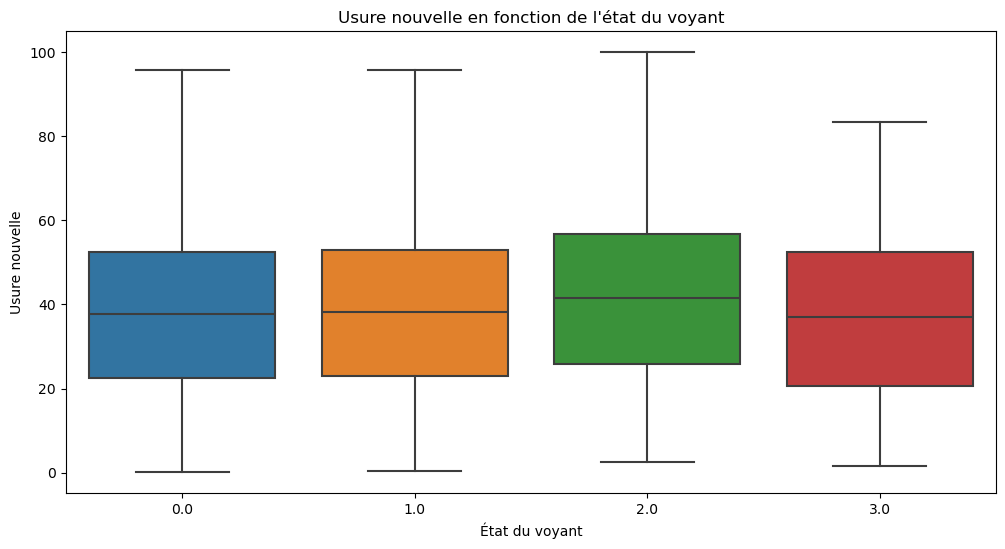

In [64]:
# Boxplot de l'usure en fonction de l'état du voyant
plt.figure(figsize=(12, 6))
sns.boxplot(x='etat_voyant', y='usure_nouvelle', data=df)
plt.title('Usure nouvelle en fonction de l\'état du voyant')
plt.xlabel('État du voyant')
plt.ylabel('Usure nouvelle')
plt.show()

c:\Users\truel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\truel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


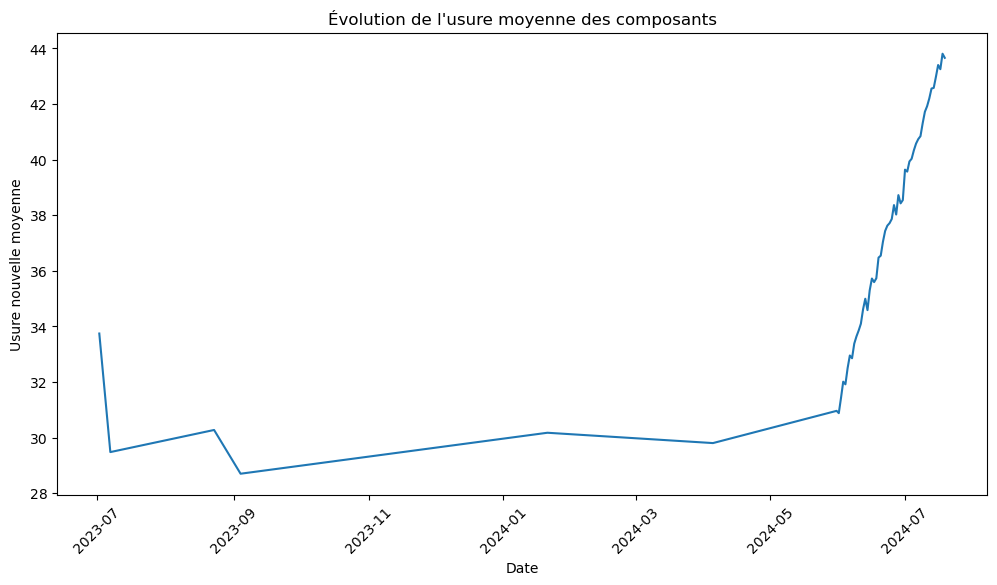

In [65]:
df['measure_day'] = pd.to_datetime(df['measure_day'])

# Usure moyenne par jour
degradationsMean = df.groupby('measure_day')['usure_nouvelle'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=degradationsMean, x='measure_day', y='usure_nouvelle')
plt.title('Évolution de l\'usure moyenne des composants')
plt.xlabel('Date')
plt.ylabel('Usure nouvelle moyenne')
plt.xticks(rotation=45)
plt.show() #usure nouvelle moyenne au fil du temps, forte augmentation a partir de juin 2024

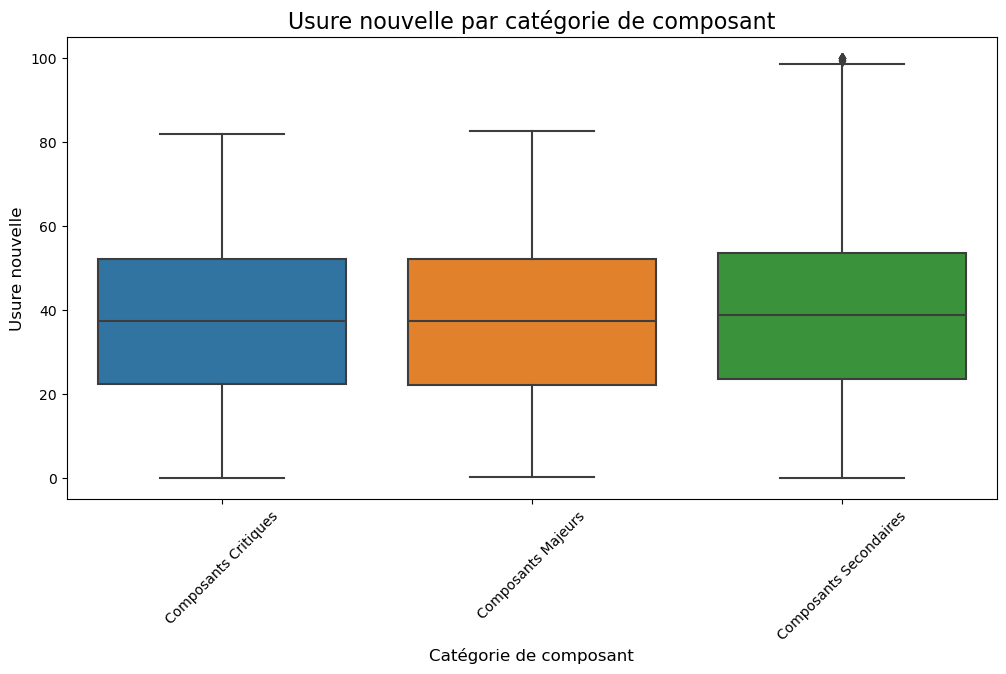

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='categorie', y='usure_nouvelle')
plt.title('Usure nouvelle par catégorie de composant', fontsize=16)
plt.xlabel('Catégorie de composant', fontsize=12)
plt.ylabel('Usure nouvelle', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show() #pas de diff

c:\Users\truel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


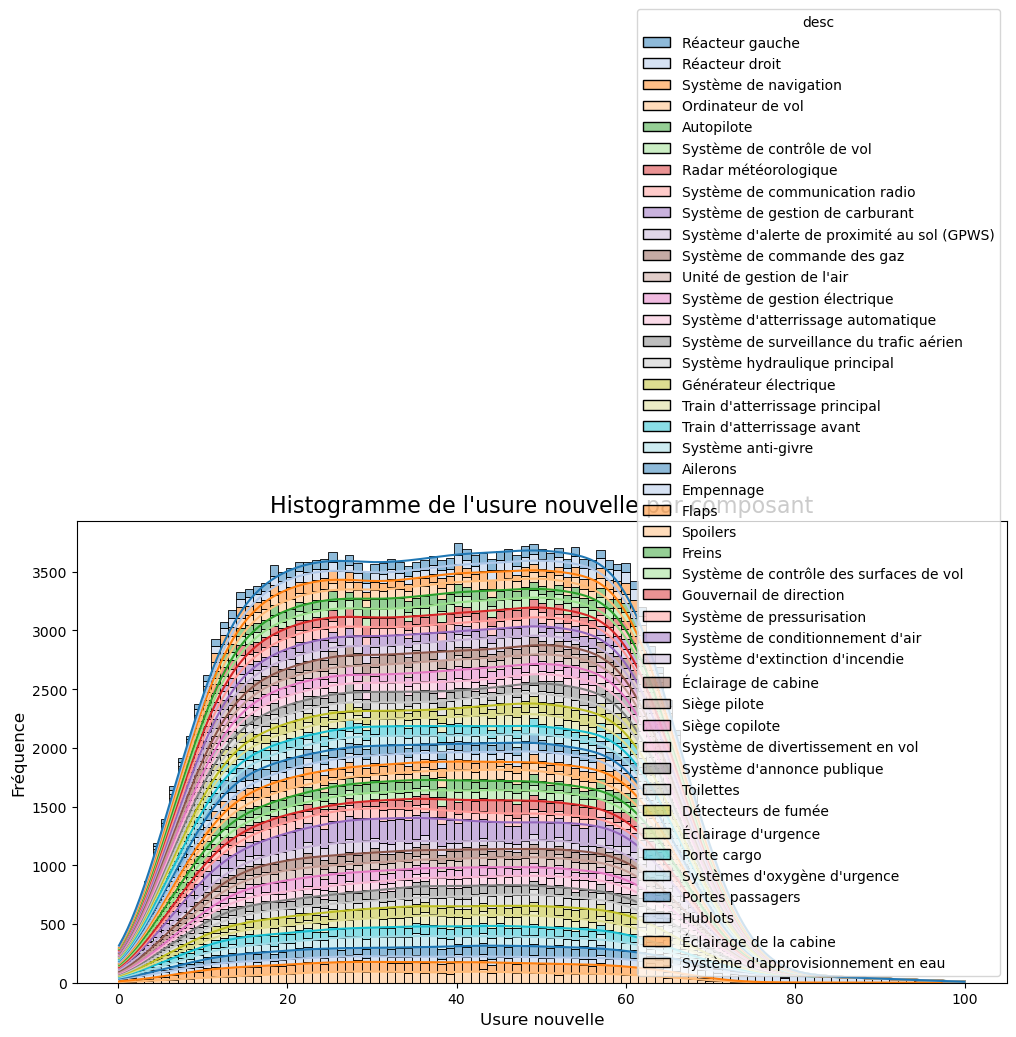

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='usure_nouvelle', hue='desc', multiple='stack', palette='tab20', kde=True)
plt.title('Histogramme de l\'usure nouvelle par composant', fontsize=16)
plt.xlabel('Usure nouvelle', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

plt.show() # je n'ai pas su mettre la legende petite proprement mais on peut voir quand meme les compo qui ont une degra plus importante